### Regression Analysis
Elements Of Data Science

In [1]:
# Import Numpy and Datascience modules.
import numpy as np
from datascience import *
import pandas as pd

# Plotting 
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import warnings
warnings.simplefilter('ignore', UserWarning)
import collections as collections
import collections.abc as abc
collections.Iterable = abc.Iterable

### Correlation

In [4]:
faithful = Table.read_table("../Lab08/faithful-new.csv")

In [5]:
faithful.stats() 

statistic,duration,wait
min,1.6,43
max,5.1,96
median,4,76
sum,948.677,19284


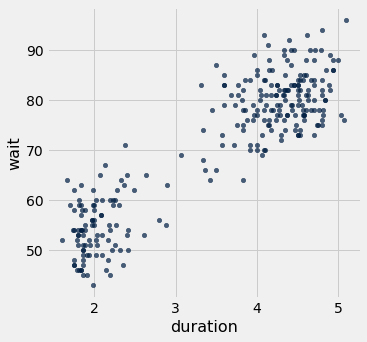

In [6]:
faithful.scatter('duration','wait')

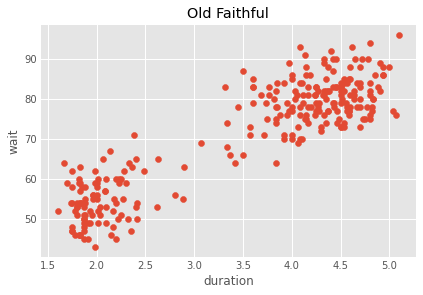

In [7]:
# Now plot
plt.style.use('ggplot')
plt.scatter(faithful.column('duration'),faithful.column('wait'))
#faithful.scatter('duration','wait') #
plt.title("Old Faithful")
plt.xlabel("duration")
plt.ylabel("wait")
plt.savefig("scatter.png") # Helpful way to save figure
plt.show()

***
Standard Units
***
$\bar{x}$=mean$(x)$<br>
<br>variance=mean$((x-\bar{x})^2)$<br>
<br>SD = $\sqrt{<(x-\bar{x})^2>}$<br>
<br>Z = ${\frac{(x-\bar{x})}{SD}}$

In [8]:
duration_mean =  np.mean(faithful["duration"])
duration_std = np.std(faithful.column("duration"))
wait_mean =  np.mean(faithful.column("wait"))
wait_std = np.std(faithful.column("wait"))

faithful_standard = Table().with_columns(
    "duration (standard units)", (faithful.column("duration") - duration_mean) / duration_std,
    "wait (standard units)", (faithful.column("wait") - wait_mean) / wait_std)
faithful_standard

duration (standard units),wait (standard units)
0.0984989,0.597123
-1.48146,-1.24518
-0.135861,0.228663
-1.0575,-0.655644
0.917443,1.03928
-0.530851,-1.17149
1.06403,1.26035
0.0984989,1.03928
-1.3498,-1.46626
0.756814,1.03928


In [9]:
np.round(np.mean(faithful_standard["duration (standard units)"]),5)

0.0

In [10]:
np.round(np.std(faithful_standard["duration (standard units)"]),5)

1.0

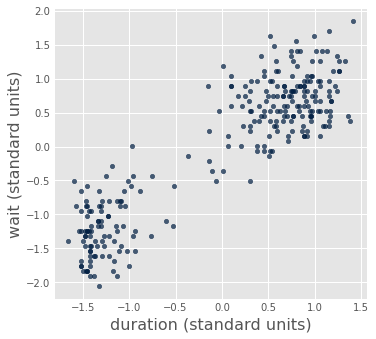

In [11]:
faithful_standard.scatter("duration (standard units)", "wait (standard units)")

In [ ]:
r = ...

In [ ]:
r = np.mean(faithful_standard["duration (standard units)"]*faithful_standard["wait (standard units)"])
r 

In [ ]:
def plot_data_and_line(dataset, x, y, point_0, point_1):
    """Makes a scatter plot of the dataset, along with a line passing through two points. x and y are strings containing column labels"""
    xdata = dataset.column(x)
    ydata = dataset.column(y)
    plt.scatter(xdata, ydata, label="data")
    xs, ys = zip(point_0, point_1)
    plt.plot(xs, ys, label="regression line")
    plt.legend(bbox_to_anchor=(1.5,.8))

In [ ]:
plot_data_and_line(faithful_standard, 
                   "duration (standard units)", 
                   "wait (standard units)", 
                   [-2, -2*r], 
                   [2, 2*r])

#### Slope
***

slope of the regression line $= r \cdot
\frac{SD_y}{SD_x}$<br>
intercept of the regression line $=
\bar{y} - slope \cdot \bar{x}$


## Variability of the Sample Mean

By the Central Limit Theorem, the probability distribution of the mean of a large random sample is roughly normal. The bell curve is centered at the population mean.

<img src='sampling_mean.png' width="500" height="340">

#### Empirical distribution of random sample means

In [ ]:
def simulate_sample_mean(table, label, sample_size, repetitions):
    
    means = []

    for i in np.arange(repetitions):
        new_sample = np.random.choice(table.column(label), sample_size)
        new_sample_mean = np.mean(new_sample)
        means.append(new_sample_mean)

    sample_means = Table().with_column('Sample Means', means)
    
    # Display empirical histogram and print all relevant quantities – don't change this!
    fig, ax = plt.subplots()
    ax.hist(means, bins=20)
    plt.xlabel('Sample Means')
    plt.title('Sample Size ' + str(sample_size))
    
    textstr = '\n'.join((
    r'$\mathrm{Sample  Size}=%.2f$' % (sample_size, ),
    r'$\mathrm{Population  Mean}=%.2f$' % (np.mean(table.column(label)), ),
    r'$\mathrm{Average Of Sample Means}=%.2f$' % (np.mean(means), ), 
    r'$\mathrm{Population SD}=%.2f$' % (np.std(table.column(label)), ),
    r'$\mathrm{SD Of Sample Means}=%.2f$' % (np.std(means), )))

    # these are matplotlib.patch.Patch properties
    props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)

    # place a text box in upper left in axes coords
    ax.text(0.95, 0.75, textstr, transform=ax.transAxes, fontsize=14,
            verticalalignment='top', bbox=props)
    
    return means

### Bootstrap: [Inferential Thinking](https://inferentialthinking.com/chapters/13/2/Bootstrap.html?highlight=bootstrap#the-bootstrap)

#### Correlation and regression tools

In [2]:
def standard_units(xyz):
    "Convert any array of numbers to standard units."
    return (xyz - np.mean(xyz))/np.std(xyz)  
def correlation(t, label_x, label_y):
    return np.mean(standard_units(t.column(label_x))*standard_units(t.column(label_y)))
# Regression
def slope(t, label_x, label_y):
    r = correlation(t, label_x, label_y)
    return r*np.std(t.column(label_y))/np.std(t.column(label_x))
def intercept(t, label_x, label_y):
    return np.mean(t.column(label_y)) - slope(t, label_x, label_y)*np.mean(t.column(label_x))

##### Apply tools to hybrid car data

In [3]:
import pandas as pd
url = "hybrid_reg.csv"
hybrid_df = pd.read_csv(url)
hybrid_T = Table.from_df(hybrid_df) # Reading and converting using pandas dataframe
hybrid = Table.read_table(url)
hybrid
hybrid_T

carid,vehicle,year,msrp,accelrate,mpg,mpgmpge,carclass,carclass_id
1,Prius (1st Gen),1997,24509.7,7.46,41.26,41.26,C,1
2,Tino,2000,35355,8.2,54.1,54.1,C,1
3,Prius (2nd Gen),2000,26832.2,7.97,45.23,45.23,C,1
4,Insight,2000,18936.4,9.52,53,53,TS,7
5,Civic (1st Gen),2001,25833.4,7.04,47.04,47.04,C,1
6,Insight,2001,19036.7,9.52,53,53,TS,7
7,Insight,2002,19137,9.71,53,53,TS,7
8,Alphard,2003,38084.8,8.33,40.46,40.46,MV,4
9,Insight,2003,19137,9.52,53,53,TS,7
10,Civic,2003,14071.9,8.62,41,41,C,1


In [ ]:
hybrid.scatter('accelrate', 'msrp')

In [ ]:
hybrid.scatter('mpg', 'msrp')

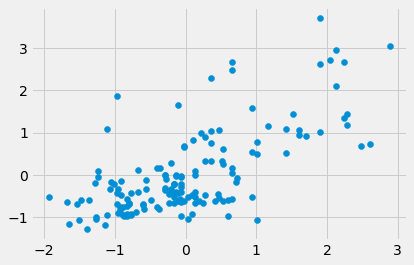

In [6]:
plt.scatter(standard_units(hybrid.column('accelrate')), standard_units(hybrid.column('msrp')), label="data")

In [7]:
def plot_data_and_regress(dataset, x, y):
    """Makes a scatter plot of the dataset, and a regression line."""
    xdata, ydata = dataset.column(x), dataset.column(y)
    plt.scatter(standard_units(xdata), standard_units(ydata), label="data in standard units")
    r = correlation(dataset,x,y)
    print("Correlation, r: ",np.round(r,6))
    slp = np.round(slope(dataset,x,y))
    print('Slope of Regression Line:    ', slp, 'y per x')
    intercp = np.round(intercept(dataset,x,y))
    print('Intercept of Regression Line:', intercp, 'y')
    xs, ys = zip([-2, -2*r], [2, 2*r])
    plt.plot(xs, ys, 'r',label="regression line")
    plt.legend(bbox_to_anchor=(1.0,.8))
    dataset.scatter(x,y, label="data in original units")
    xs, ys = zip([xdata.min(), xdata.min()*slp+intercp], [xdata.max(), xdata.max()*slp+intercp])
    plt.plot(xs, ys, 'g',label="regression line")
    plt.legend(bbox_to_anchor=(1.07,0.8))

Correlation, r:  0.695578
Slope of Regression Line:     5068.0 y per x
Intercept of Regression Line: -21282.0 y


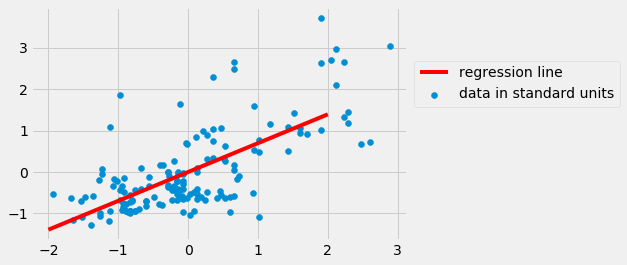

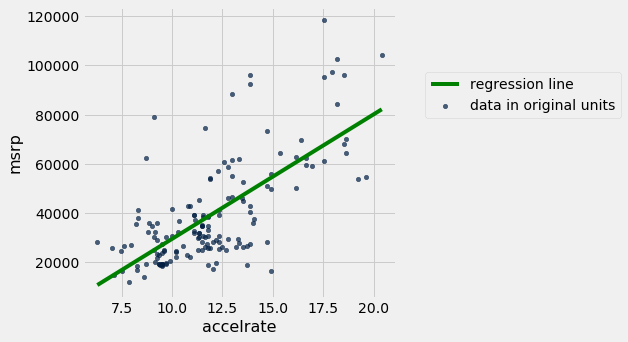

In [8]:
plot_data_and_regress(hybrid,'accelrate','msrp')

In [9]:
def rmse(dataset,x,y):
    xdata, ydata = dataset.column(x), dataset.column(y)
    slp = np.round(slope(dataset,x,y))
    print('Slope of Regression Line:    ', slp, 'y per x')
    intercp = np.round(intercept(dataset,x,y))
    print('Intercept of Regression Line:', intercp, 'y')
    fitted = slp * xdata + intercp
    mse = np.mean((ydata - fitted) ** 2)
    print("Root mean squared error:", mse ** 0.5)

In [10]:
rmse(hybrid,'accelrate','msrp')

Slope of Regression Line:     5068.0 y per x
Intercept of Regression Line: -21282.0 y
Root mean squared error: 15339.646665465307


In [ ]:
def lw_mse(any_slope, any_intercept):
    x = little_women.column('Periods')
    y = little_women.column('Characters')
    fitted = any_slope*x + any_intercept
    return np.mean((y - fitted) ** 2)

In [22]:
def lw_mse(any_slope,any_intercept):
    xdata, ydata = hybrid.column('accelrate'), hybrid.column('msrp')
    fitted = any_slope * xdata + any_intercept
    mse = np.mean((ydata - fitted) ** 2)
    print("Root mean squared error:", mse ** 0.5)
    return mse

In [23]:
best = minimize(lw_mse)
best

Root mean squared error: 44742.41246511989
Root mean squared error: 44742.41246511989
Root mean squared error: 44730.93086161264
Root mean squared error: 44712.35417312308
Root mean squared error: 42694.76716320163
Root mean squared error: 16154.414690073761
Root mean squared error: 65954.64303161329
Root mean squared error: 16154.414690073761
Root mean squared error: 29283.944542799352
Root mean squared error: 22109.7271345521
Root mean squared error: 16159.802158899083
Root mean squared error: 16159.80215890118
Root mean squared error: 16154.414690073761
Root mean squared error: 16154.489358122675
Root mean squared error: 16154.29400501366
Root mean squared error: 16142.106262110585
Root mean squared error: 16109.355972564987
Root mean squared error: 16194.957069473361
Root mean squared error: 16109.355972564987
Root mean squared error: 16121.873322209747
Root mean squared error: 16114.1383223109
Root mean squared error: 16109.360484737557
Root mean squared error: 16109.36048473781
R

array([  4704.56749136, -16588.52767294])

### Values from minimization and regression
### Minimization
any_slope = 4704.56749136  any_intercept = -16588.5276729
### Regression
Slope of Regression Line:     5068.0 y per x
Intercept of Regression Line: -21282.0 y